In [204]:
import numpy as np
import pandas as pd
import os
import datetime

import klib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline


In [173]:
os.chdir("E:\\EY_case_study\\ttc_bus_delay")

In [174]:
ttc_bus_delay_2019 = pd.read_excel("ttc-bus-delay-data-2019.xlsx")
ttc_bus_delay_2020 = pd.read_excel("ttc-bus-delay-data-2020.xlsx")
ttc_bus_delay_2021 = pd.read_excel("ttc-bus-delay-data-2021.xlsx")

In [118]:
ttc_bus_delay_2019.columns

Index(['Report Date', 'Route', 'Time', 'Day', 'Location', 'Incident', 'Delay',
       'Gap', 'Direction', 'Vehicle'],
      dtype='object')

In [5]:
ttc_bus_delay_2019["Incident"].value_counts()

Mechanical                          21148
General Delay                       11587
Utilized Off Route                   9109
Investigation                        8126
Diversion                            4567
Late Leaving Garage                  3728
Emergency Services                   1557
unknown                               935
Late Leaving Garage - Mechanical      643
Vision                                470
Late Leaving Garage - Operator        330
Late Leaving Garage - Management      122
Late Leaving Garage - Vision           54
Name: Incident, dtype: int64

In [6]:
ttc_bus_delay_2020["Incident"].value_counts()

Mechanical                            12506
Utilized Off Route                     5184
Investigation                          3738
Cleaning                               2013
Emergency Services                     1749
Diversion                              1680
General Delay                          1512
Late Leaving Garage - Operator         1387
Operations - Operator                  1313
Late Leaving Garage - Mechanical       1218
Security                               1038
Collision - TTC                         911
Road Blocked - NON-TTC Collision        631
Vision                                  498
Late Leaving Garage - Management        362
Late Leaving Garage - Vision            114
Road Block - Non-TTC Collision           39
Management                               33
Utilizing Off Route                       5
Securitty                                 3
Late Entering Service - Mechanical        3
Roadblock by Collision - Non-TTC          1
Name: Incident, dtype: int64

In [7]:
ttc_bus_delay_2021["Incident"].value_counts()

Cleaning                            8953
Mechanical                          6037
Operations - Operator               3425
Security                            1455
Collision - TTC                     1136
Emergency Services                   908
Road Blocked - NON-TTC Collision     638
Investigation                        592
General Delay                        521
Vision                               426
Utilized Off Route                   201
Diversion                             73
Held By                               65
Late Entering Service                 11
Management                             9
Late Leaving Garage - Operator         8
Late Leaving Garage - Mechanical       4
Late Leaving Garage - Operations       4
e                                      1
Late Leaving Garage                    1
Collision - TTC                        1
Name: Incident, dtype: int64

In [8]:
ttc_bus_delay_2021.head(5)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2021-01-01,320,04:26,Friday,YONGE AND STEELES,Emergency Services,0,0,N,1553
1,2021-01-01,63,05:04,Friday,CANNIFF AND STRACHAN,Mechanical,10,0,N,8144
2,2021-01-01,42,05:34,Friday,WILSON GARAGE,Mechanical,24,48,N,8365
3,2021-01-01,320,05:44,Friday,YONGE AND STEELES,Emergency Services,15,30,N,8181
4,2021-01-01,35,06:21,Friday,JANE STATION,Vision,30,60,E,3186


# Design an ML to detect/classify Mechanical incident among all

In [ ]:
# we will use 2020 data as training and 2021 data as holdout

GridSpec(6, 6)

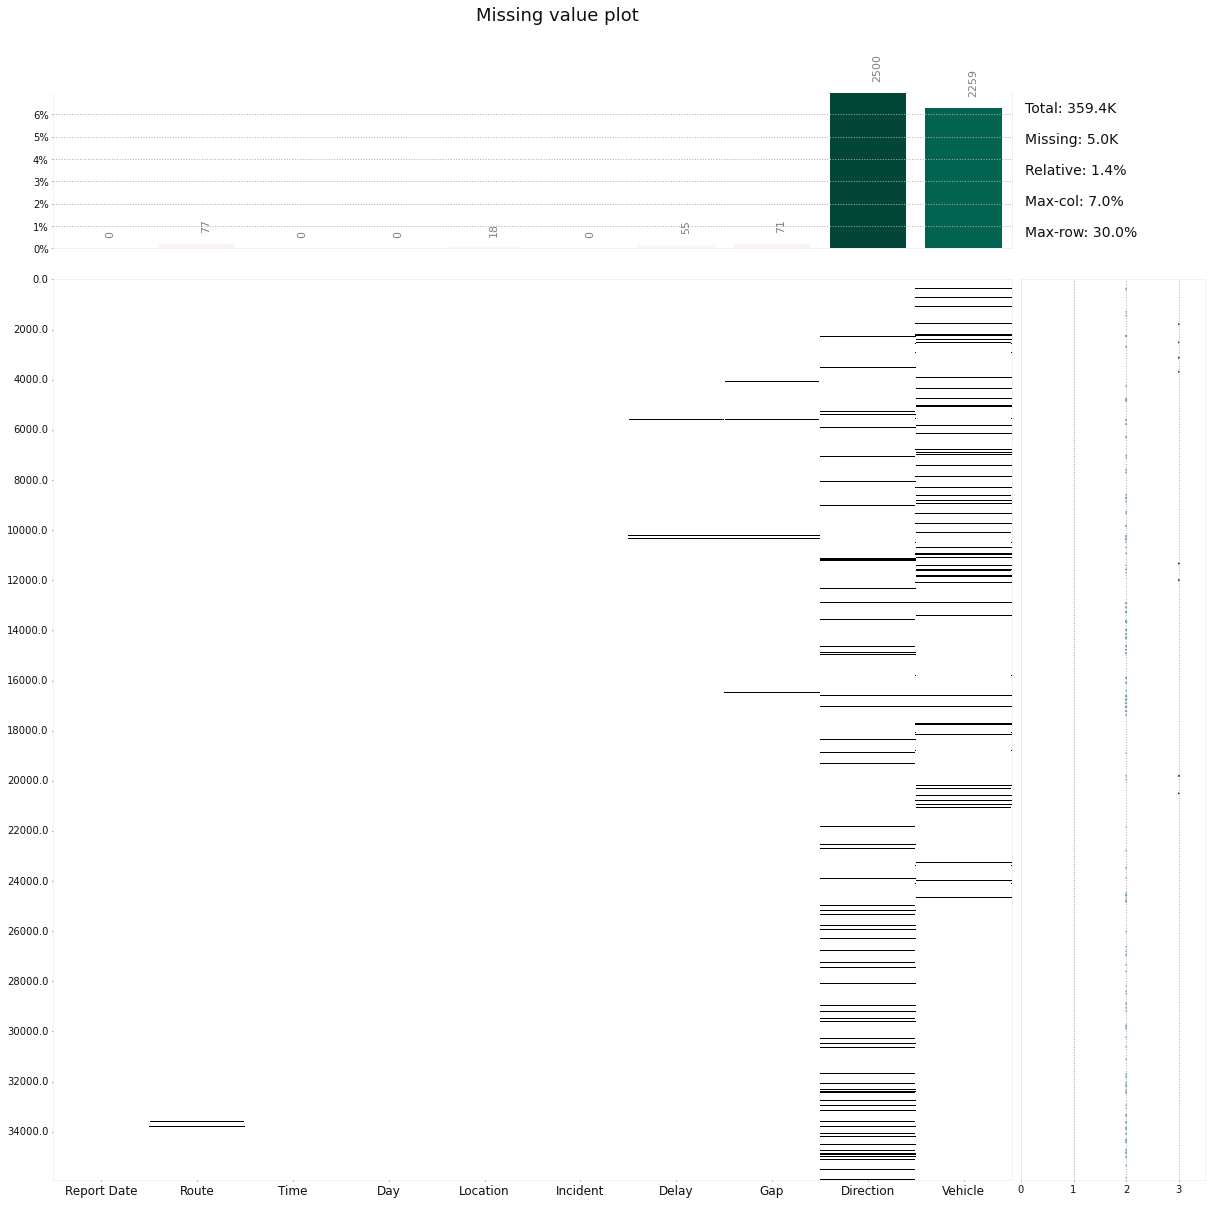

In [10]:
klib.missingval_plot(ttc_bus_delay_2020)

In [11]:
bus_2021_cleaned = klib.data_cleaning(ttc_bus_delay_2021)

Shape of cleaned data: (24330, 10)Remaining NAs: 2664

Changes:
Dropped rows: 139
     of which 139 duplicates. (Rows: [159, 213, 232, 269, 480, 536, 910, 1233, 1264, 1476, 1480, 1569, 1717, 1777, 1829, 2234, 2424, 2474, 2477, 3678, 3834, 4151, 4257, 4342, 4866, 4880, 5029, 5258, 5377, 6687, 7296, 7322, 7710, 7806, 7969, 8601, 8691, 8832, 8887, 8938, 8957, 9077, 9084, 9086, 9089, 9090, 9096, 9120, 9158, 9174, 9557, 9681, 9781, 10052, 10068, 10258, 10291, 10365, 10419, 11312, 11390, 11541, 11663, 11756, 11998, 12191, 13038, 13651, 14021, 14022, 14125, 14161, 14234, 14537, 14715, 14716, 14777, 14863, 14869, 15093, 15095, 15100, 15459, 15590, 16022, 16081, 16082, 16310, 16316, 16472, 16873, 17478, 17687, 18279, 18285, 18341, 18343, 18496, 18850, 18851, 18863, 18864, 19069, 19078, 19218, 19338, 19823, 20229, 20259, 20360, 20530, 21030, 21215, 21239, 21241, 21254, 21272, 21666, 22222, 22643, 22821, 22939, 22986, 23109, 23182, 23330, 23728, 24043, 24277, 24316, 24358, 24371, 24381, 24384, 24

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

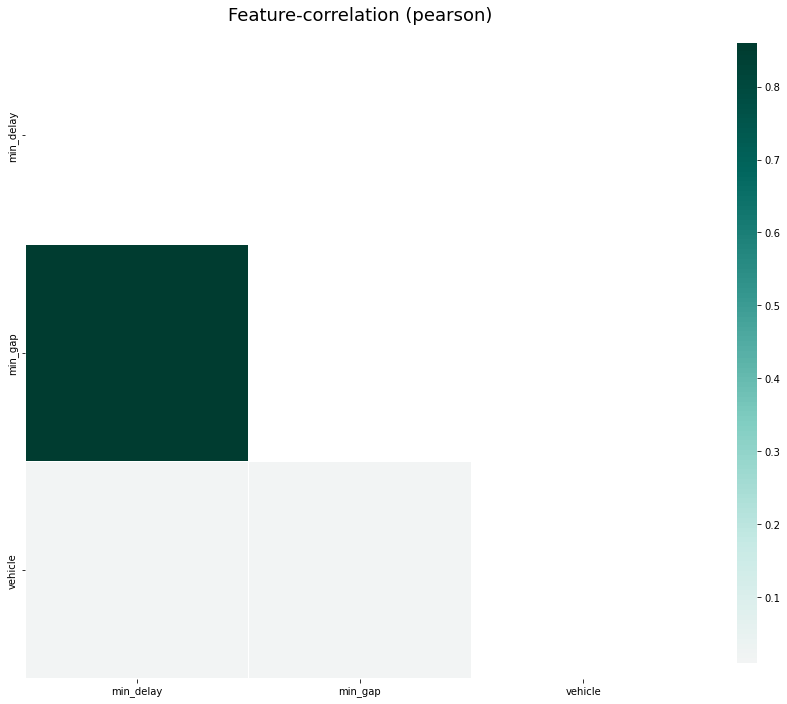

In [12]:
# The gif below shows the output of the following three function calls:

klib.corr_plot(bus_2021_cleaned, annot=False, figsize=(15,12))
# klib.corr_plot(bus_2021_cleaned, split='pos', annot=False, figsize=(15,12))
# klib.corr_plot(bus_2021_cleaned, split='neg', annot=False, figsize=(15,12))

GridSpec(6, 4)

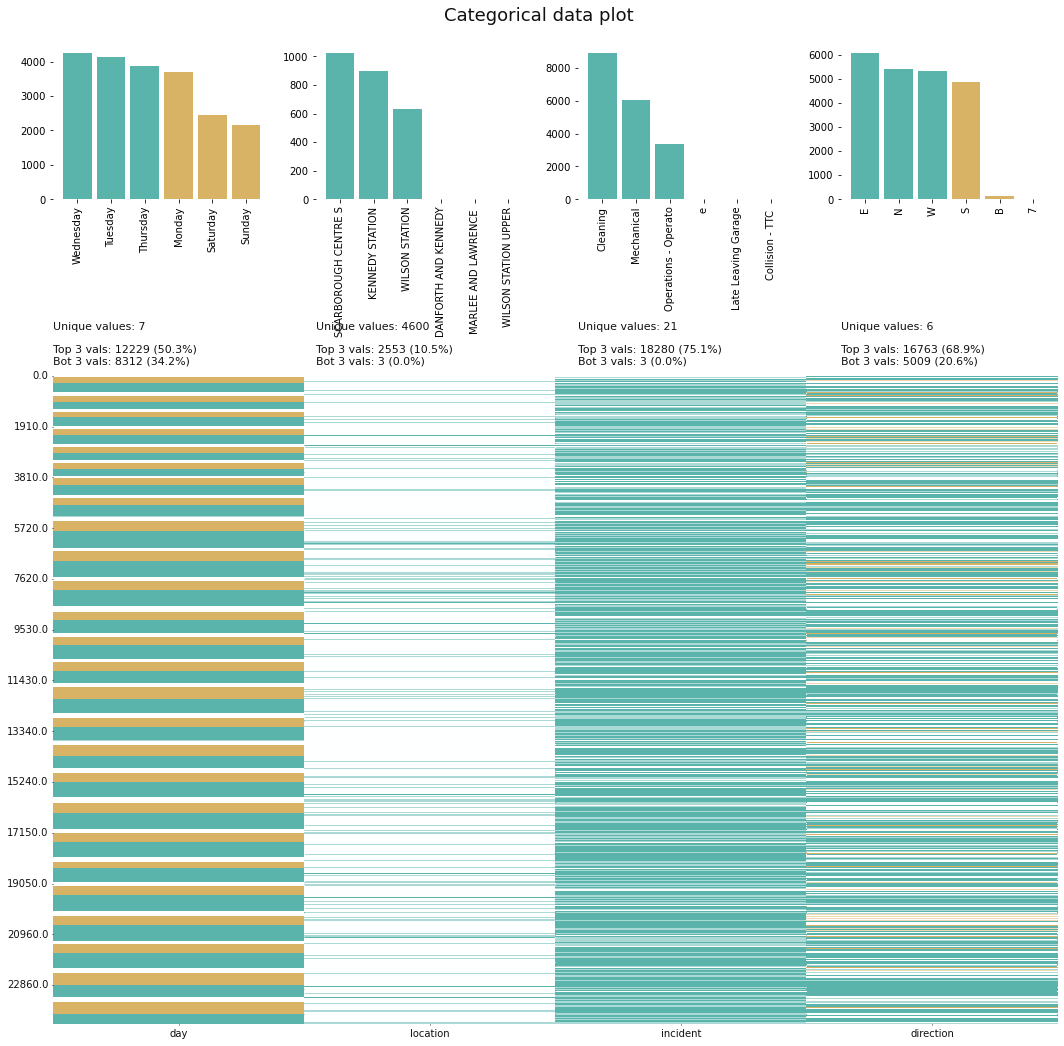

In [13]:
# categorical data visuals
klib.cat_plot(bus_2021_cleaned[["day","location","incident","direction"]])

# Preprocess the Data

In [154]:
ttc_bus_delay_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35938 entries, 0 to 35937
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Report Date  35938 non-null  datetime64[ns]
 1   Route        35861 non-null  float64       
 2   Time         35938 non-null  object        
 3   Day          35938 non-null  object        
 4   Location     35920 non-null  object        
 5   Incident     35938 non-null  object        
 6   Delay        35883 non-null  float64       
 7   Gap          35867 non-null  float64       
 8   Direction    33438 non-null  object        
 9   Vehicle      33679 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 2.7+ MB


In [155]:
ttc_bus_delay_2020

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle
0,2020-01-01,94.0,00:01:00,Wednesday,Ossington station and Castle Frank Station,General Delay,10.0,20.0,B/W,NaN
1,2020-01-01,320.0,01:31:00,Wednesday,Yonge @ Queen,Diversion,1.0,1.0,B/W,NaN
2,2020-01-01,29.0,01:37:00,Wednesday,Dufferin loop,Mechanical,8.0,14.0,N/B,9028.0
3,2020-01-01,102.0,01:40:00,Wednesday,Warden station,Mechanical,11.0,22.0,N/B,8504.0
4,2020-01-01,68.0,01:42:00,Wednesday,Warden Station,Mechanical,8.0,23.0,N/B,8721.0
...,...,...,...,...,...,...,...,...,...,...
35933,2020-12-31,36.0,23:44,Thursday,FINCH AND ISLINGTON,Security,10.0,20.0,W,3298.0
35934,2020-12-31,43.0,00:32,Thursday,KENNEDY STATION,Security,14.0,28.0,NaN,8706.0
35935,2020-12-31,86.0,01:08,Thursday,MEADOWVALE AND SHEPPAR,Emergency Services,10.0,20.0,E,8899.0
35936,2020-12-31,76.0,01:23,Thursday,LAKE SHORE AND MIMICO,Road Blocked - NON-TTC Collision,86.0,101.0,NaN,0.0


In [175]:
ttc_bus_delay_2020["Date_time"] = ttc_bus_delay_2020["Report Date"].apply(lambda x: x.strftime('%Y-%m-%d'))


In [176]:
ttc_numeric = ttc_bus_delay_2020.select_dtypes(include=[np.number]).columns
ttc_categorical = ttc_bus_delay_2020.select_dtypes(exclude=[np.number]).columns.drop(["Incident","Report Date","Time"])
ttc_col = list(ttc_numeric) + list(ttc_categorical)

In [177]:
ttc_numeric, ttc_categorical,ttc_col

(Index(['Route', 'Delay', 'Gap', 'Vehicle'], dtype='object'),
 Index(['Day', 'Location', 'Direction', 'Date_time'], dtype='object'),
 ['Route',
  'Delay',
  'Gap',
  'Vehicle',
  'Day',
  'Location',
  'Direction',
  'Date_time'])

In [178]:
# set our target label

ttc_bus_delay_2020["label"] = np.where((ttc_bus_delay_2020["Incident"] == "Mechanical") | (ttc_bus_delay_2020["Incident"] == "Cleaning"),
                                       1,0)

In [179]:
ttc_bus_delay_2020.drop(["Report Date","Incident","Time"], axis= 1, inplace = True)

In [180]:
ttc_bus_delay_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35938 entries, 0 to 35937
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Route      35861 non-null  float64
 1   Day        35938 non-null  object 
 2   Location   35920 non-null  object 
 3   Delay      35883 non-null  float64
 4   Gap        35867 non-null  float64
 5   Direction  33438 non-null  object 
 6   Vehicle    33679 non-null  float64
 7   Date_time  35938 non-null  object 
 8   label      35938 non-null  int32  
dtypes: float64(4), int32(1), object(4)
memory usage: 2.3+ MB


In [228]:
X = ttc_bus_delay_2020.drop(columns = "label")
y = ttc_bus_delay_2020["label"]

X_col = X.columns

# PCA

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import category_encoders as ce

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer

In [261]:
tg_encoder = ce.TargetEncoder()
num_impute = SimpleImputer(strategy='mean')




ttc_bus_delay_2020_encode = tg_encoder.fit(ttc_bus_delay_2020,ttc_bus_delay_2020["label"]).transform(ttc_bus_delay_2020)
tg_encoder_model = tg_encoder.fit(ttc_bus_delay_2020,ttc_bus_delay_2020["label"])


ttc_bus_delay_2020_encode.drop(columns="label",inplace = True)
ttc_bus_delay_2020_1 = num_impute.fit(ttc_bus_delay_2020_encode).transform(ttc_bus_delay_2020_encode)


# pca_preprocess = make_pipeline(
#     (num_impute,ttc_col),)


# ttc_bus_delay_2020_1 = pca_preprocess.fit_transform(ttc_bus_delay_2020_encode,ttc_bus_delay_2020["label"])

C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [246]:
ttc_bus_delay_2020_1.shape

(35938, 8)

In [202]:
# tg_encoder.fit(ttc_bus_delay_2020,ttc_bus_delay_2020["label"]).transform(ttc_bus_delay_2020).info()

In [201]:
# num_impute.fit(ttc_bus_delay_2020_encode).transform(ttc_bus_delay_2020_encode)

<Figure size 864x864 with 0 Axes>

Text(0.5, 0, 'PCA 1')

Text(0, 0.5, 'PCA 2')

Text(0.5, 1.0, "PCA analysis to 'ttc_bus_delay_2020' data")

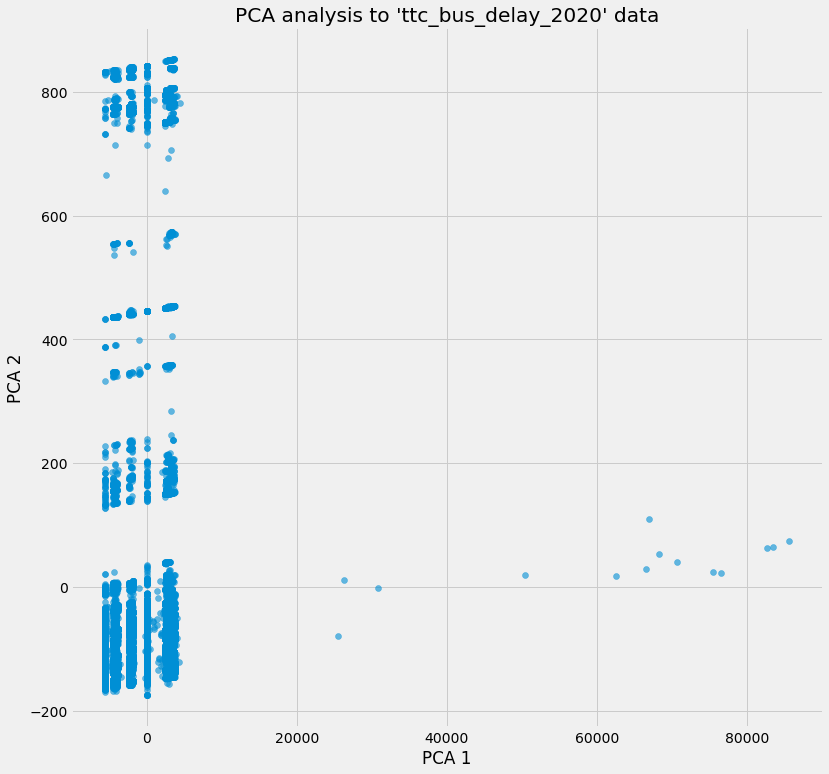

PC_1 explains 0.993936606932155, PC_2 explains 0.005344433737003151
Total ratio explained by PC_1 and PC_2 is 0.9992810406691581


In [244]:
std_scaler = StandardScaler(with_mean=False, with_std=False)
scaled_df = std_scaler.fit_transform(ttc_bus_delay_2020_1)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)


# PCA plot
plt.figure(figsize=(12,12))

plt.scatter(x = pca_data[:,0],
            y = pca_data[:,1],
            alpha= 0.6,            #alpha here is the tranparency
            cmap = "plasma")       #cmap here is the color        

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA analysis to 'ttc_bus_delay_2020' data")
plt.style.use('fivethirtyeight')

plt.show()

print("PC_1 explains {}, PC_2 explains {}".format(pca.explained_variance_ratio_[0],pca.explained_variance_ratio_[1]))
print("Total ratio explained by PC_1 and PC_2 is {}".format(pca.explained_variance_ratio_.sum()))


# plt.savefig('bus_delay_PCA.png')

# ML learning

In [238]:
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split

In [247]:
X_train, X_test, y_train, y_test = train_test_split(ttc_bus_delay_2020_1, ttc_bus_delay_2020["label"], test_size=0.2, random_state=42)

In [248]:
pipeline_lgbm = make_pipeline(
    lgbm_classifier)

pipeline_rf = make_pipeline(
    rf_classsifier)

pipeline_xgb = make_pipeline(
    xgb_classifier)

pipeline_lgr = make_pipeline(
    logistic_classifier)


pipelines = [pipeline_lgbm, pipeline_rf, pipeline_xgb, pipeline_lgr]



pipe_dict = {
    0:"LightGMB Classifier",
    1:"RandomForest Classifier",
    2:"XGBoost Classifier",
    3:"Logistic Classifier"
}

for i,pipeline in enumerate(pipelines):

    scores = cross_val_score(pipeline, X_train, y_train, 
                         scoring='f1_micro', cv=5, n_jobs=-1)

    print("{} CV f1-micro scores are {}".format(pipe_dict[i],scores))
    print("{} mean score is {}".format(pipe_dict[i],np.mean(scores)))
    print()

LightGMB Classifier CV f1-micro scores are [0.724      0.73217391 0.74034783 0.7333913  0.74017391]
LightGMB Classifier mean score is 0.734017391304348

RandomForest Classifier CV f1-micro scores are [0.7213913  0.72208696 0.73965217 0.71913043 0.73043478]
RandomForest Classifier mean score is 0.7265391304347826

XGBoost Classifier CV f1-micro scores are [0.71704348 0.73078261 0.74452174 0.73252174 0.72852174]
XGBoost Classifier mean score is 0.7306782608695652

Logistic Classifier CV f1-micro scores are [0.59130435 0.7013913  0.59426087 0.69982609 0.70782609]
Logistic Classifier mean score is 0.6589217391304347



# Prediction on Holdouts 2020 Data

In [264]:
from sklearn.metrics import accuracy_score

In [265]:
from sklearn.metrics import accuracy_score

for i, pipeline in enumerate(pipelines):
    
    best_model = pipeline.fit(X_train, y_train)
    predict = best_model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    
    print("{} X_test accuracy score is {}".format(pipe_dict[i],acc))
    print()

LightGMB Classifier X_test accuracy score is 0.7349749582637729

RandomForest Classifier X_test accuracy score is 0.7324707846410684

[10:55:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jiawe\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost Classifier X_test accuracy score is 0.7341402337228714

Logistic Classifier X_test accuracy score is 0.6933778519755147



C:\Users\jiawe\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
